# BUSINESS UNDERSTANDING

### 1.1 Business overview
Terry stops - is a police procedure that allows law enforcement officers to briefly detain an individual on the basis of reasonable suspicion that they may be engaging in, or will engage in, criminal activity.  a police officer stops a person when they have a reasonable suspicion that the person in question has committed a crime, is committing a crime, or will commit a crime. Reasonable suspicion is a lower standard than probable cause, which is required for an arrest. 

### 1.2 Business Objective

To build a classifier to predict whether an arrest was made after a Terry Stop, given information about the presence of weapons, the time of day of the call, etc. This is a binary classification problem

# DATA UNDERSTANDING
This dataset was obtained from [data.seattle.gov] website. URL https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/about_data

This data represents records of police reported stops under Terry v. Ohio, 392 U.S. 1 (1968)

Rows
64.8K
Columns
23
Each row is a
A unique record of a Terry Stop, as reported by the officer conducting the stop.

### Columns
1. **Subject Age Group** - Subject Age Group (10 year increments) as reported by the officer.

2. **Subject ID** - Key(Unique Identifier)

3. **GO / SC Num** - General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

4. **Terry Stop ID** - Key identifying unique Terry Stop reports.

5. **Stop Resolution** - Resolution of the stop as reported by the officer.

6. **Weapon Type** - Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

7. **Officer ID** - Key identifying unique officers in the dataset.

8. **Officer YOB** - Year of birth, as reported by the officer.

9. **Officer Gender** - Gender of the officer, as reported by the officer.

10. **Officer Race** - Race of the officer, as reported by the officer.

11. **Subject Perceived Race** - Perceived race of the subject, as reported by the officer.

12. **Subject Perceived Gender** - Perceived gender of the subject, as reported by the officer.

Reported Date
Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.
reported_date
Floating Timestamp
Reported Time
Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.
reported_time
Text
Initial Call Type
Initial classification of the call as assigned by 911.
initial_call_type
Text
Final Call Type
Final classification of the call as assigned by the primary officer closing the event.
final_call_type
Text
Call Type
How the call was received by the communication center.
call_type
Text
Officer Squad
Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).
officer_squad
Text
Arrest Flag
Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).
arrest_flag
Text
Frisk Flag
Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.
frisk_flag
Text
Precinct
Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
precinct
Text
Sector
Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
sector
Text
Beat
Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
beat
Text


In [135]:
# Importing the necessecary libraries
import pandas as pd # Data manipulation
import numpy as np # Mathematics
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Advanved visualization

In [136]:
# Setting the maximum display of columns to 30 
# This is to get a look at all the columns
pd.options.display.max_columns = 30

In [137]:
# Creating a varible (terry_stops) tosave the terry stops datasets
terry_stops = pd.read_csv(r"C:\Users\Jeremy\Downloads\Terry_Stops_20250908.csv")

# Getting the first 5 rows 
terry_stops.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,46 - 55,-1,20180000275629,481899,Field Contact,NaN,8544,1993,Female,Hispanic,White,Male,2018-07-30T00:00:00,13:47:00.0000000,-,-,-,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,West,Q,Q2
1,36 - 45,53986235598,20240000029589,53986202139,Field Contact,-,8723,1994,Male,White,Black or African American,Male,2024-02-01T00:00:00,02:50:52.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,DISTURBANCE - OTHER,ONVIEW,WEST PCT 3RD W - KING - PLATOON 1,N,N,West,D,D2
2,26 - 35,-1,20170000036835,234548,Offense Report,NaN,4852,1953,Male,Asian,White,Male,2017-01-30T00:00:00,18:36:00.0000000,DISTURBANCE,THEFT - SHOPLIFT,911,NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
3,18 - 25,-1,20180000271087,445585,Offense Report,NaN,8588,1986,Female,White,Black or African American,Male,2018-07-23T00:00:00,05:43:00.0000000,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...","WEAPON, PERSON WITH - GUN",911,TRAINING - FIELD TRAINING SQUAD,N,Y,North,J,J1
4,18 - 25,-1,20150000002928,54115,Field Contact,NaN,7745,1988,Female,Declined to Answer,Black or African American,Female,2015-06-17T00:00:00,00:22:00.0000000,-,-,-,SOUTH PCT 3RD W - SAM - PLATOON 2,N,N,-,-,-


In [138]:
# Getting infomation about the datasets
terry_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64699 entries, 0 to 64698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         64699 non-null  object
 1   Subject ID                64699 non-null  int64 
 2   GO / SC Num               64699 non-null  int64 
 3   Terry Stop ID             64699 non-null  int64 
 4   Stop Resolution           64699 non-null  object
 5   Weapon Type               32134 non-null  object
 6   Officer ID                64699 non-null  object
 7   Officer YOB               64699 non-null  int64 
 8   Officer Gender            64699 non-null  object
 9   Officer Race              64699 non-null  object
 10  Subject Perceived Race    64699 non-null  object
 11  Subject Perceived Gender  64699 non-null  object
 12  Reported Date             64699 non-null  object
 13  Reported Time             64699 non-null  object
 14  Initial Call Type     

# Data Preparation

In [139]:
# Creating a column 'Year'  
terry_stops['Year'] = terry_stops['Reported Date'].apply(lambda x: pd.to_datetime(x).year)

The 'Year' column will be able to show if the arrest was made after terry stops(after 1968) or before (before 1967)

In [140]:
# Creating a function to replace '-' with 'Unknown'
def replace_func(data):
    data = data.replace(to_replace= '-', value= 'Unknown', inplace= True)
    return data


In [141]:
# Reolacing NaN with Unknown from weapon type column
terry_stops['Weapon Type'] = terry_stops['Weapon Type'].replace(to_replace= np.nan, value= 'Unknown')

# Replacing '-' with 'Unknown'
replace_func(terry_stops['Weapon Type'])

In [142]:
# Getting the unique values and their counts after changes
terry_stops['Weapon Type'].value_counts()

Weapon Type
Unknown                                 60566
Knife/Cutting/Stabbing Instrument        1491
Lethal Cutting Instrument                1482
Handgun                                   430
Blunt Object/Striking Implement           199
Firearm                                   131
Firearm Other                             100
Other Firearm                              85
Mace/Pepper Spray                          64
Club, Blackjack, Brass Knuckles            49
None/Not Applicable                        21
Taser/Stun Gun                             20
Firearm (unk type)                         15
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Blackjack                                   1
Poison                                      1
Brass Knuckles        

<Axes: title={'center': '10 most found weapon type'}, xlabel='Count', ylabel='Weapon type'>

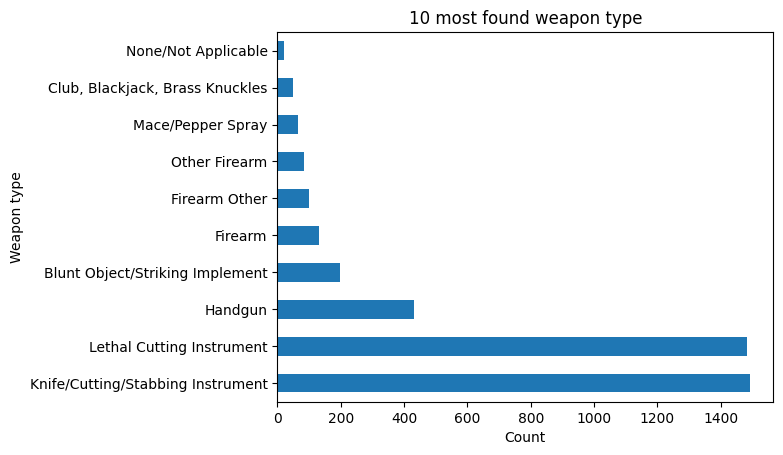

In [143]:
# Creating a bar graph for 10 weapon type excluding the unknown
terry_stops['Weapon Type'].value_counts()[1:].nlargest(10).plot(kind= 'barh',
                                                                title= '10 most found weapon type',
                                                                xlabel= "Count",
                                                                ylabel= 'Weapon type')

In [144]:
replace_func(terry_stops['Subject Age Group']) #  Replacing '-' with 'Unknown'
terry_stops['Subject Age Group'].value_counts() # Getting the unique values and their counts

Subject Age Group
26 - 35         21564
36 - 45         14697
18 - 25         12077
46 - 55          8182
56 and Above     3421
1 - 17           2391
Unknown          2367
Name: count, dtype: int64

<Axes: xlabel='Subject Age Group', ylabel='Count'>

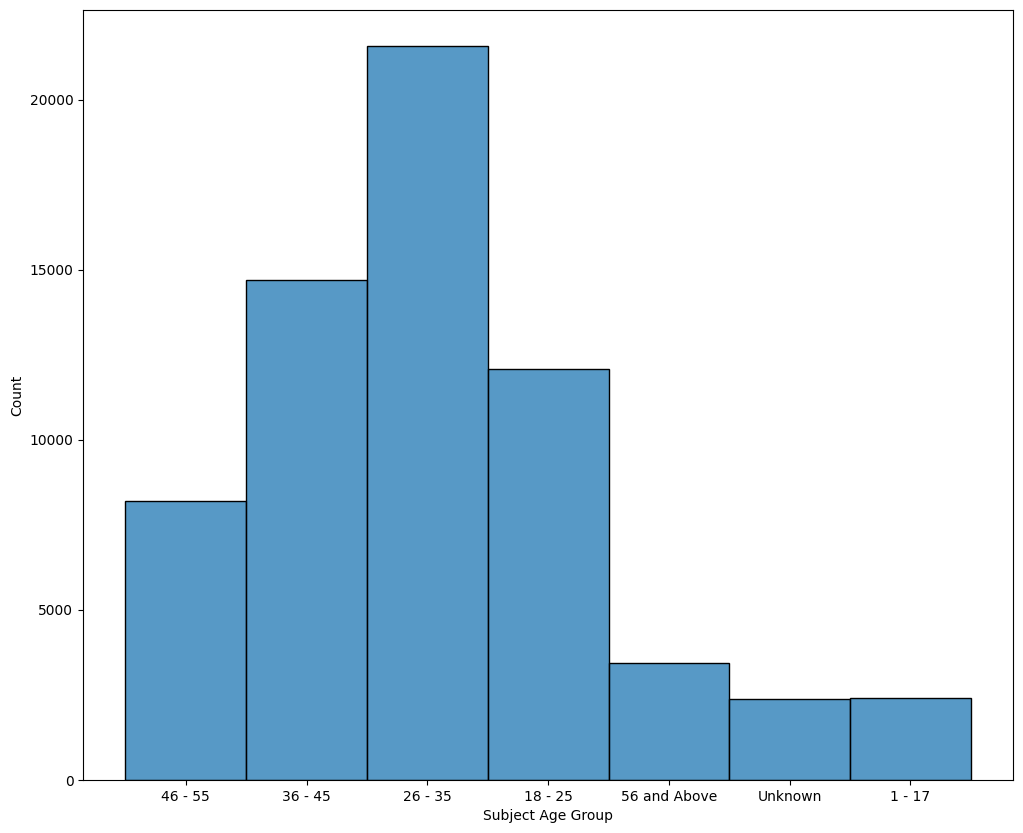

In [145]:
# Creating a histogram to show the distribution of subject group age
plt.figure(figsize=(12,10))
sns.histplot(data= terry_stops['Subject Age Group'])



From the histogram, the largest groups are between 26-35, 36-45 and 18-25.

From 18-45 age group are likely to be subject of arrest


In [146]:
replace_func(terry_stops['Subject Perceived Race'])

# Getting a table to see the subject's age group and their race
terry_stops.groupby('Subject Age Group')['Subject Perceived Race'].value_counts(ascending= False,
                                                                                sort= True).unstack(fill_value= 0)


Subject Perceived Race,American Indian or Alaska Native,Asian,Black or African American,Hispanic,MULTIPLE SUBJECTS,Multi-Racial,Native Hawaiian or Other Pacific Islander,Other,Unknown,White
Subject Age Group,,,,,,,,,,
1 - 17,48,81,1157,105,0,62,8,7,270,653
18 - 25,289,438,4066,441,0,254,52,42,1341,5154
26 - 35,554,654,5951,561,0,276,57,51,2182,11278
36 - 45,476,565,3945,350,0,122,49,25,1278,7887
46 - 55,254,302,2503,171,0,74,8,21,587,4262
56 and Above,93,137,1198,31,0,13,4,4,260,1681
Unknown,32,52,684,25,1,8,7,2,841,715


<Axes: title={'center': 'Race and the age group'}, xlabel='Subject Age Group'>

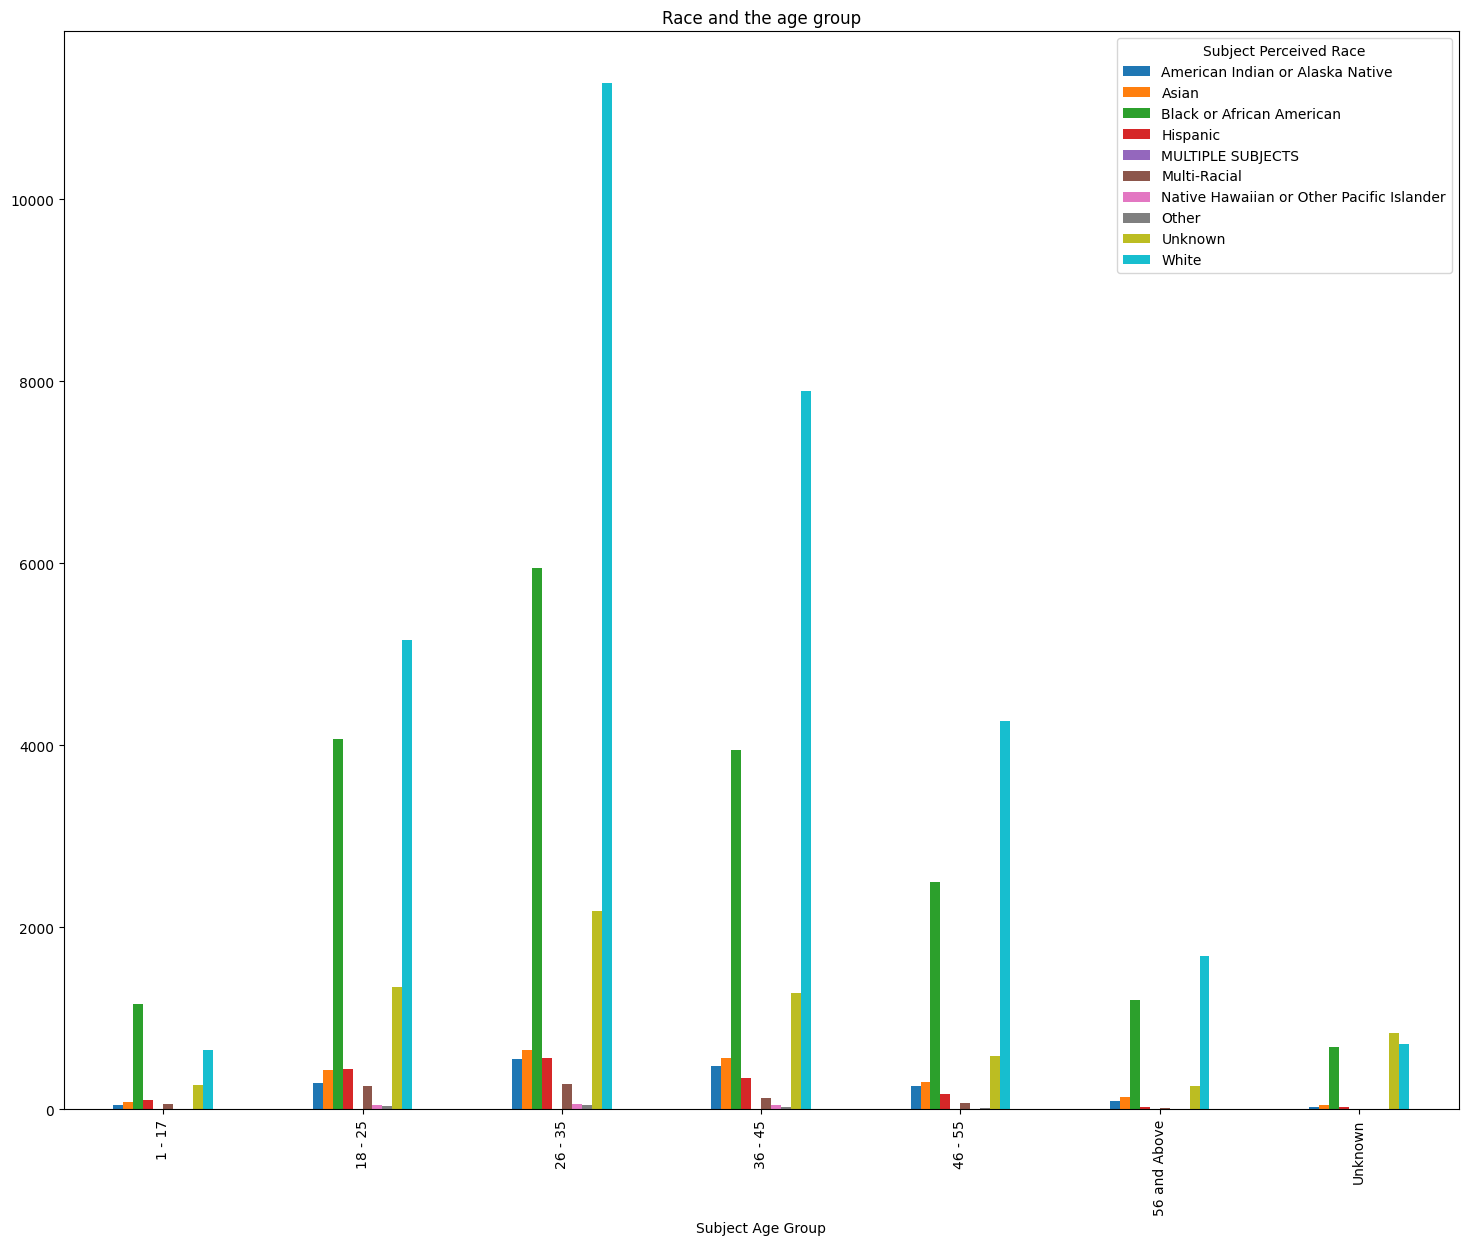

In [147]:
terry_stops.groupby('Subject Age Group')['Subject Perceived Race'].value_counts(ascending= False,
                                                                                sort= True).unstack(fill_value= 0).plot(kind= 'bar',
                                                                                                                        figsize=(18,14),
                                                                                                                        title= 'Race and the age group')

From the graph. The whites age between 26-35 are the ones high likely to be stopped

In [148]:
replace_func(terry_stops['Subject Perceived Gender'])

# Getting a table to show subject's gender and the stop resolution
terry_stops.groupby('Subject Perceived Gender')['Stop Resolution'].value_counts().unstack(fill_value= 0)

Stop Resolution,Arrest,Citation / Infraction,Field Contact,Offense Report,Referred for Prosecution
Subject Perceived Gender,,,,,
Female,2801,42,6292,3566,181
Gender Diverse (gender non-conforming and/or transgender),16,0,42,7,0
MULTIPLE SUBJECTS,0,0,1,0,0
Male,12628,181,25509,12202,543
Unable to Determine,51,4,160,108,3
Unknown,45,0,203,113,1


<Axes: title={'center': 'Subject Gender and the Stop Resolution'}, xlabel='Gender', ylabel='Stop Resolution'>

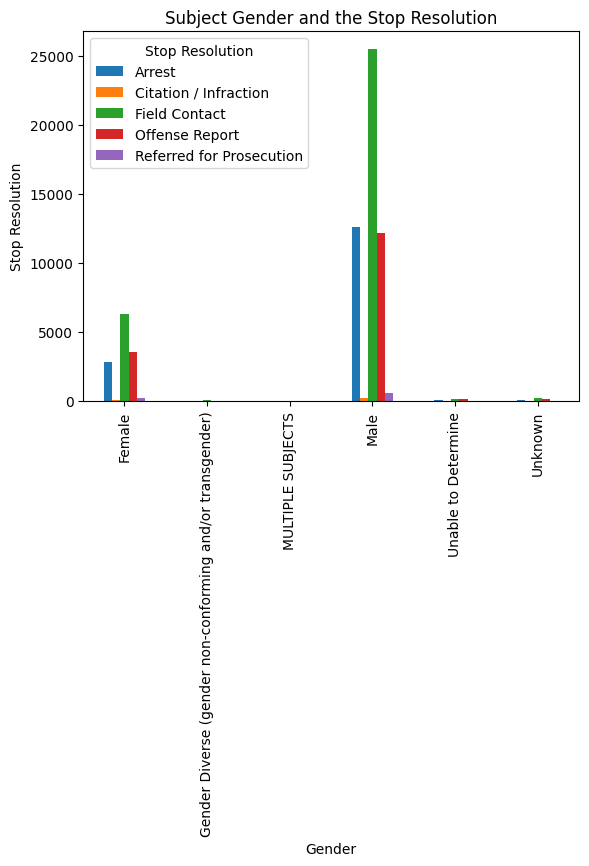

In [149]:
terry_stops.groupby('Subject Perceived Gender')['Stop Resolution'].value_counts().unstack(fill_value= 0).plot(kind= 'bar',
                                                                                                              title= 'Subject Gender and the Stop Resolution',
                                                                                                              xlabel= 'Gender',
                                                                                                              ylabel= 'Stop Resolution')

From the graph. Male gender are the ones to be stopped mostly

The highest stop resolution is field contract

In [150]:
#table of officer gender and race and subject race
terry_stops.groupby(['Officer Gender','Officer Race'])['Subject Perceived Race'].value_counts().unstack(fill_value= 0)

Subject Perceived Race                                    American Indian or Alaska Native  \
Officer Gender Officer Race                                                                  
Female         American Indian or Alaska Native                                          0   
               Asian                                                                     3   
               Black or African American                                                 3   
               Declined to Answer                                                        2   
               Hispanic                                                                 11   
               Native Hawaiian or Other Pacific Islander                                 0   
               Two or More Races                                                        38   
               White                                                                   130   
Male           American Indian or Alaska Native                                         14   
               Asian                                                                    86   
               Black or African American                                                70   
               Declined to Answer                                                       65   
               Hispanic                                                                 95   
               Native Hawaiian or Other Pacific Islander                                19   
               Two or More Races                                                        84   
               Unknown                                                                   1   
               White                                                                  1123   
Non-Specified  Unknown                                                                   2   

Subject Perceived Race                                    Asian  \
Officer Gender Officer Race                                       
Female         American Indian or Alaska Native               0   
               Asian                                         12   
               Black or African American                      5   
               Declined to Answer                             9   
               Hispanic                                       8   
               Native Hawaiian or Other Pacific Islander      1   
               Two or More Races                             25   
               White                                        196   
Male           American Indian or Alaska Native               6   
               Asian                                        125   
               Black or African American                     82   
               Declined to Answer                            73   
               Hispanic                                     184   
               Native Hawaiian or Other Pacific Islander     13   
               Two or More Races                            135   
               Unknown                                        0   
               White                                       1355   
Non-Specified  Unknown                                        0   

Subject Perceived Race                                    Black or African American  \
Officer Gender Officer Race                                                           
Female         American Indian or Alaska Native                                   4   
               Asian                                                             46   
               Black or African American                                         48   
               Declined to Answer                                                67   
               Hispanic                                                          86   
               Native Hawaiian or Other Pacific Islander                          1   
               Two or More Races                                                29

<Axes: xlabel='Officer Gender,Officer Race'>

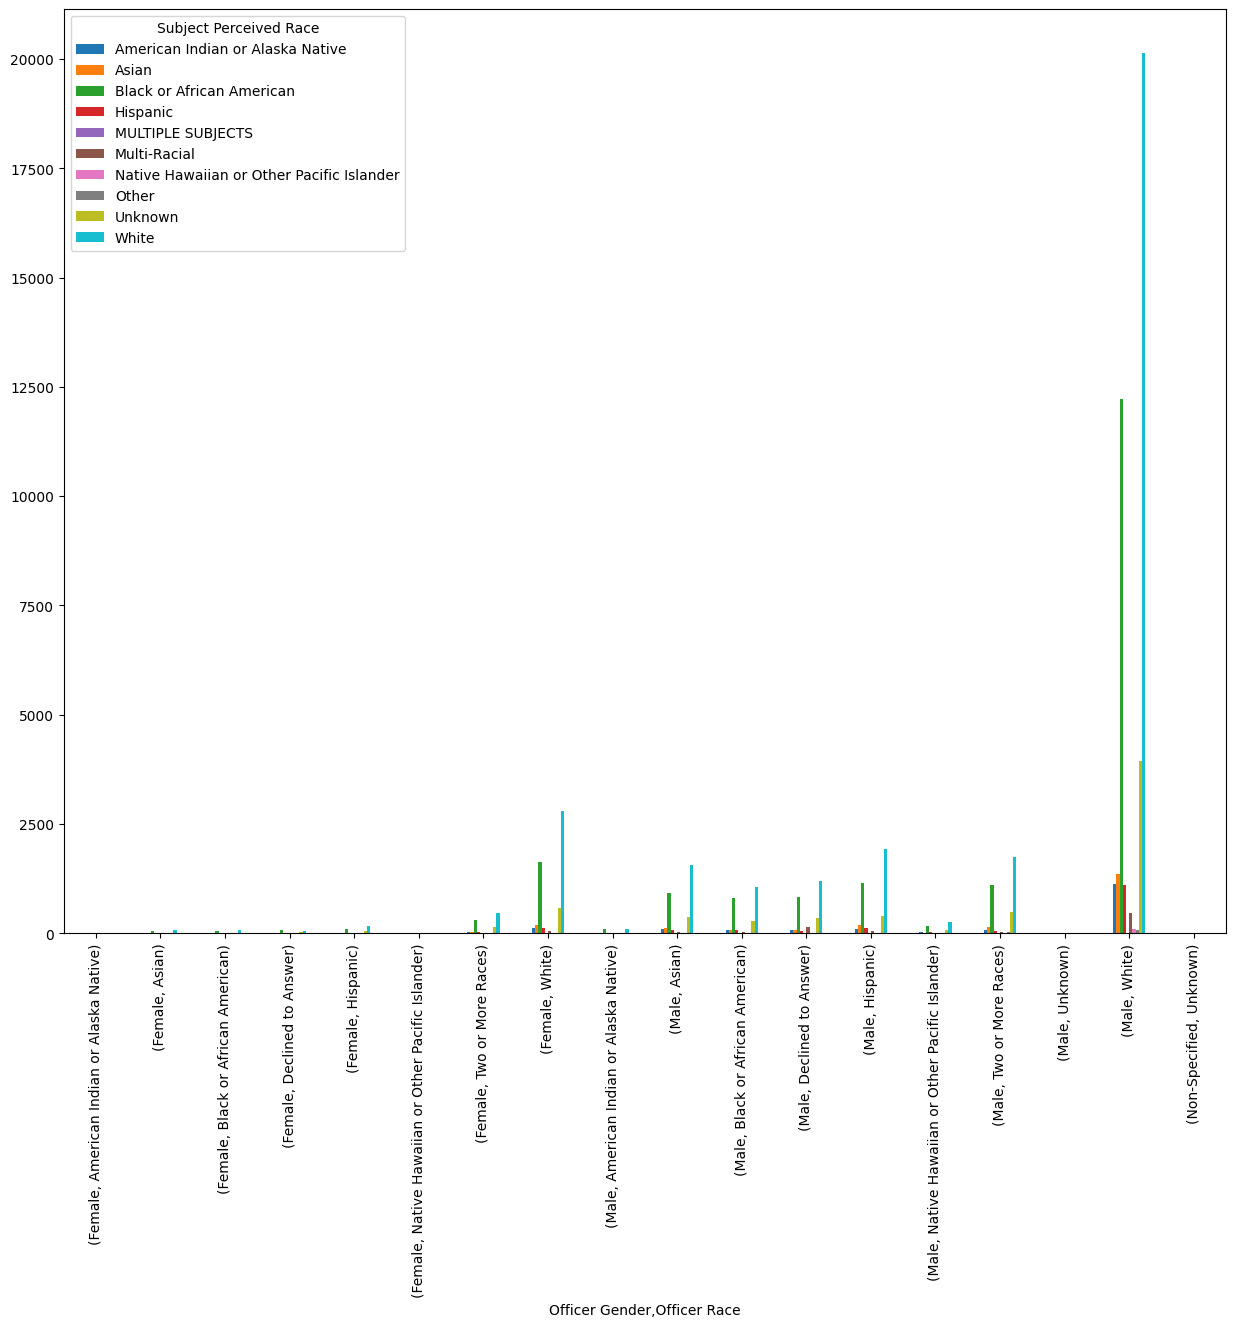

In [151]:
# Getting a graph of the table of officer gender and race and subject race
terry_stops.groupby(['Officer Gender','Officer Race'])['Subject Perceived Race'].value_counts().unstack(fill_value= 0).plot(kind='bar',
                                                                                                                            figsize=(15,12))

From the graph there is a trend of white officers having high number of stops. 

The most stopped race is whites and the blacks

In [152]:
replace_func(terry_stops['Initial Call Type'])

In [153]:
terry_stops['Arrest Flag'].value_counts() # Getting the unique values and their counts

Arrest Flag
N    57366
Y     7333
Name: count, dtype: int64

<Axes: xlabel='Arrest Flag', ylabel='count'>

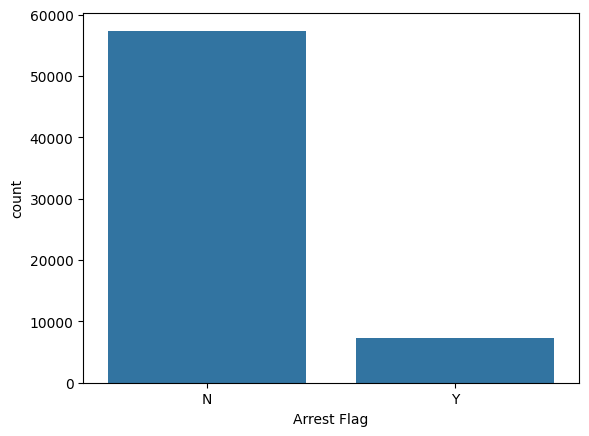

In [154]:
# Getting a bar graph of the arrest flag values
sns.barplot(data= terry_stops['Arrest Flag'].value_counts())

# Encoding

In [155]:
terry_stops['Arrest Flag Encoded'] = terry_stops['Arrest Flag'].map({'N': 0, 'Y': 1}) # To reduce bias in the model

In [156]:
from sklearn.preprocessing import OneHotEncoder # To encode to 0 and 1

# Initializing OneHotEncoder 
encoder = OneHotEncoder(handle_unknown= 'ignore', sparse_output= False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(terry_stops[['Weapon Type','Officer Gender', 'Officer Race', 
                                                  'Subject Perceived Race', 'Subject Perceived Gender', 
                                                  'Subject Age Group','Year','Initial Call Type']])

# Creating a dataframe from the encoded data.
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Weapon Type','Officer Gender', 'Officer Race', 
                                                  'Subject Perceived Race', 'Subject Perceived Gender', 
                                                  'Subject Age Group','Year','Initial Call Type']))

terry_stops_enoded = pd.concat([terry_stops, encoded_df], axis=1)





**OneHotEncoder** is used because there is no clear order between the categories.

For order between categories **LabelEncoder** is used

In [157]:
terry_stops['Arrest Flag Encoded'].value_counts()

Arrest Flag Encoded
0    57366
1     7333
Name: count, dtype: int64

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [159]:
X = terry_stops_enoded[encoded_df.columns]
y = terry_stops['Arrest Flag Encoded']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [161]:
#plt.figure(figsize=(18,16))
#corr=X_train.corr()
#sns.heatmap(corr,annot=True)

In [162]:
##  Logistic Model
model = LogisticRegression(penalty='elasticnet', class_weight='balanced', solver='saga', l1_ratio=0.5) # l1_ratio required for elasticnet
model.fit(X_train, y_train)

,penalty,'elasticnet'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

print(f'Accuracy score {score}')
print(f'Confusion matrix:\n{cm}')
print(f'Classification report:\n{cr}')


Accuracy score 0.8868006182380216
Confusion matrix:
[[14343     1]
 [ 1830     1]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     14344
           1       0.50      0.00      0.00      1831

    accuracy                           0.89     16175
   macro avg       0.69      0.50      0.47     16175
weighted avg       0.84      0.89      0.83     16175



In [163]:
## Prediction based on probability
# useful to understand the confidence of predictions
model_prob=model.predict_proba(X_test)
model_prob

array([[9.96955813e-01, 3.04418665e-03],
       [3.42114255e-01, 6.57885745e-01],
       [5.06110762e-01, 4.93889238e-01],
       ...,
       [9.99236928e-01, 7.63072154e-04],
       [9.99989270e-01, 1.07303386e-05],
       [3.06375033e-01, 6.93624967e-01]], shape=(16175, 2))

In [164]:
y_pred= model.predict(X_test) 

In [165]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

print(f'Accuracy score {score}')
print(f'Confusion matrix:\n{cm}')
print(f'Classification report:\n{cr}')



Accuracy score 0.7116537867078825
Confusion matrix:
[[9831 4513]
 [ 151 1680]]
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     14344
           1       0.27      0.92      0.42      1831

    accuracy                           0.71     16175
   macro avg       0.63      0.80      0.61     16175
weighted avg       0.90      0.71      0.76     16175



accuracy_score = proportion of correct predictions

confusion_matrix = matrix showing true positives, true negatives, false positives, and false negatives

classification_report = includes precision, recall, F1-score for each class

In [166]:
y_hat_test = model.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    11511
1     4664
Name: count, dtype: int64

Residuals (proportions)
0    0.711654
1    0.288346
Name: proportion, dtype: float64


# Hyperparameter Tuning

### Randomized SearchCV

In [167]:
from sklearn.model_selection import RandomizedSearchCV
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
params=dict(penalty=penalty,C=c_values,solver=solver)


In [168]:
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')
randomcv.fit(X_train,y_train)

,estimator,LogisticRegre...solver='saga')
,param_distributions,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [169]:
randomcv.best_score_

np.float64(0.7592928127493965)

In [170]:
y_pred=randomcv.predict(X_test)

In [171]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7073261205564142
              precision    recall  f1-score   support

           0       0.69      0.98      0.81     10078
           1       0.87      0.26      0.40      6097

    accuracy                           0.71     16175
   macro avg       0.78      0.62      0.60     16175
weighted avg       0.76      0.71      0.65     16175

[[9844  234]
 [4500 1597]]


In [172]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier(max_depth= 20)

In [173]:
treeclassifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [174]:
y_pred=treeclassifier.predict(X_test)

In [175]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[14110   234]
 [ 1651   180]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     14344
           1       0.43      0.10      0.16      1831

    accuracy                           0.88     16175
   macro avg       0.67      0.54      0.55     16175
weighted avg       0.84      0.88      0.85     16175



In [176]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [177]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy') # Tuning the decission tree model

In [179]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

,estimator,DecisionTreeC...(max_depth=20)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'log_loss'


In [180]:
grid.best_score_

np.float64(0.8867158526065511)

In [181]:
y_pred=grid.predict(X_test)

In [182]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[14343     1]
 [ 1830     1]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     14344
           1       0.50      0.00      0.00      1831

    accuracy                           0.89     16175
   macro avg       0.69      0.50      0.47     16175
weighted avg       0.84      0.89      0.83     16175



[Text(0.6877208295991237, 0.9761904761904762, 'x[246] <= 0.5\ngini = 0.201\nsamples = 48524\nvalue = [43022, 5502]'),
 Text(0.40475120383805624, 0.9285714285714286, 'x[60] <= 0.5\ngini = 0.239\nsamples = 38208\nvalue = [32907, 5301]'),
 Text(0.54623601671859, 0.9523809523809523, 'True  '),
 Text(0.4038407679668829, 0.8809523809523809, 'x[59] <= 0.5\ngini = 0.265\nsamples = 33680\nvalue = [28379, 5301]'),
 Text(0.40293033209570955, 0.8333333333333334, 'x[58] <= 0.5\ngini = 0.29\nsamples = 30134\nvalue = [24833, 5301]'),
 Text(0.40201989622453627, 0.7857142857142857, 'x[57] <= 0.5\ngini = 0.319\nsamples = 26662\nvalue = [21361, 5301]'),
 Text(0.4011094603533629, 0.7380952380952381, 'x[21] <= 0.5\ngini = 0.349\nsamples = 23495\nvalue = [18194, 5301]'),
 Text(0.10304818197336975, 0.6904761904761905, 'x[12] <= 0.5\ngini = 0.48\nsamples = 1751\nvalue = [1052, 699]'),
 Text(0.10213774610219643, 0.6428571428571429, 'x[56] <= 0.5\ngini = 0.488\nsamples = 1659\nvalue = [960, 699]'),
 Text(0.0888

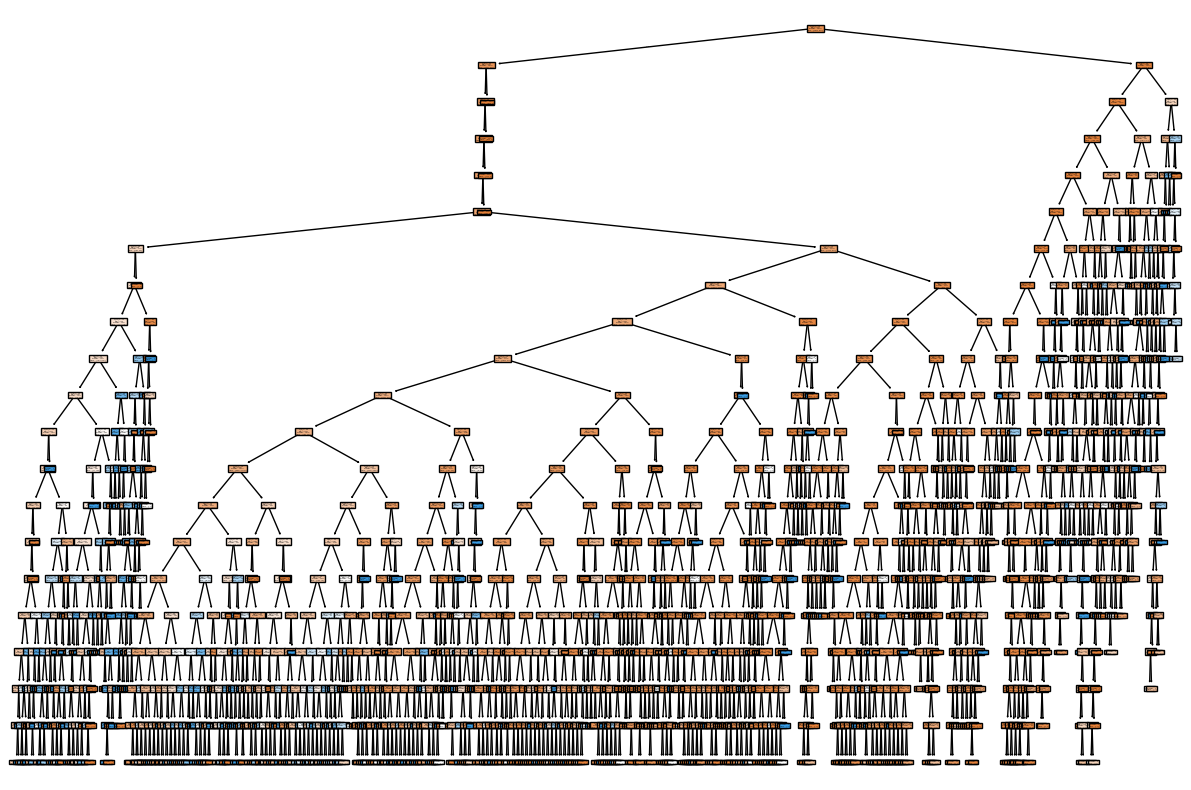

In [183]:
##Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)